In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Gradient Descent

In [2]:
def gd(theta, grad, eta, data, max_iter=10):
    # Takes in original parameter estimate theta, gradient function grad, step-size eta
    # Returns parameter estimates obtained after max_iter steps
    thetas = np.zeros((theta.shape[0], max_iter + 1))
    thetas[:, 0] = theta.flatten()
    for i in range(max_iter):
        theta = theta + eta * grad(theta, data)
        thetas[:, i+1] = theta.flatten()
    return thetas

# Newton-Raphson

In [3]:
def nr(theta, grad, data, inverse_hessian, max_iter=10, eta = 1):
    # Takes in original parameter estimate theta, gradient function grad
    # Returns parameter estimates obtained after max_iter eta
    thetas = np.zeros((theta.shape[0], max_iter + 1))
    thetas[:, 0] = theta.flatten()
    for i in range(max_iter):
        theta = theta - eta*inverse_hessian(theta, data) @ grad(theta, data)
        thetas[:, i+1] = theta.flatten()
    return thetas

# Fisher's scoring

In [4]:
def fisher(theta, grad, data, inverse_info, max_iter=10, eta = 1):
    # Takes in original parameter estimate theta, gradient function grad
    # Returns parameter estimates obtained after max_iter eta
    thetas = np.zeros((theta.shape[0], max_iter + 1))
    thetas[:, 0] = theta.flatten()
    for i in range(max_iter):
        theta = theta - eta*inverse_info(theta, data) @ grad(theta, data)
        thetas[:, i+1] = theta.flatten()
    return thetas

# BFGS

In [5]:
def bfgs(f, theta, grad, data, max_iter=10):
    # Takes in original parameter estimate theta, negative likelihood function f, negative gradient function grad
    # Returns parameter estimates obtained after max_iter eta
    thetas = np.zeros((theta.shape[0], max_iter + 1))
    thetas[:, 0] = theta.flatten()
    I = np.diag(np.ones(theta.shape[0]))
    B = np.copy(I)
    B_inverse = np.copy(I)
    for i in range(max_iter):
        p = -B_inverse @ grad(theta, data)
        alpha = line_search(f, grad, p , theta, 1, data)
        s = alpha * p
        next_theta = (theta + s)
        y = grad(next_theta, data) - grad(theta, data)
        B = B + (y @ y.T)/(y.T @ s) - (B @ s @ s.T @ B.T)/(s.T @ B @ s)
        B_inverse = (I - (s @ y.T)/(y.T @ s)) @ B_inverse @ (I - (s @ y.T)/(y.T @ s)) + (s @ s.T)/(y.T @ s)
        theta = next_theta
        thetas[:, i+1] = theta.flatten()
    return thetas

def line_search(f, grad, p, theta, alpha, data, lower = 0, upper = float("inf"), c1 = 0.0001, c2 = 0.1):
    if f(theta, data) + c1 * alpha * p.T @ grad(theta, data) - f(theta + alpha * p, data) < 0:
        return line_search(f, grad, p, theta, 0.5*(lower + alpha), data, lower = 0, upper = alpha)
    elif -c2 * p.T @ grad(theta, data) + p.T @ grad(theta + alpha * p, data) < 0:
        return line_search(f, grad, p, theta, 2*alpha, data, lower = alpha, upper = float("inf"))
    return alpha

# Example 1 - Poisson, 1 Dimension

In [6]:
np.random.seed(0)
data = np.random.poisson(lam = 56.3, size = 1000)

In [7]:
def l1(theta, data):
    return np.sum(data)*np.log(theta) - len(data)*theta

def neg_l1(theta, data):
    return -l1(theta, data)
    
def grad1(theta, data):
    return np.sum(data)/theta - len(data)

def neg_grad1(theta, data):
    return -grad1(theta, data)

def inverse_hessian1(theta, data):
    return -(theta**2)/np.sum(data)

def inverse_info1(theta, data):
    return -(theta)/len(data)

In [8]:
theta0 = np.array([[5]])

In [9]:
%%time
thetas0 = gd(theta0, grad1, 10/len(data), data, max_iter = 50).flatten()
thetas0

CPU times: user 1.53 ms, sys: 500 µs, total: 2.03 ms
Wall time: 1.53 ms


array([  5.        , 107.796     , 103.02791955,  98.50196972,
        94.2275405 ,  90.21283946,  86.46449946,  82.98717644,
        79.78316618,  76.85207592,  74.19058946,  71.79236219,
        69.6480725 ,  67.74564046,  66.07060419,  64.60662421,
        63.33606963,  62.24063228,  61.30191555,  60.50195433,
        59.82363668,  59.25101407,  58.76950095,  58.36597516,
        58.02879666,  57.74776436,  57.51402988,  57.31998507,
        57.15913627,  57.02597536,  56.91585443,  56.82486846,
        56.74974845,  56.68776607,  56.63664991,  56.5945129 ,
        56.55978994,  56.53118482,  56.50762529,  56.4882252 ,
        56.47225281,  56.45910426,  56.44828152,  56.43937398,
        56.43204329,  56.42601067,  56.42104653,  56.41696179,
        56.41360078,  56.41083535,  56.40856002])

In [10]:
%%time
thetas1 = nr(theta0, grad1, data, inverse_hessian1, max_iter=10).flatten()
thetas1

CPU times: user 702 µs, sys: 1.03 ms, total: 1.73 ms
Wall time: 1.47 ms


array([ 5.        ,  9.55672187, 17.49404353, 29.56162586, 43.6282036 ,
       53.50662619, 56.24976704, 56.39761039, 56.398     , 56.398     ,
       56.398     ])

In [11]:
%%time
thetas2 = fisher(theta0, grad1, data, inverse_info1, max_iter=10).flatten()
thetas2

CPU times: user 607 µs, sys: 290 µs, total: 897 µs
Wall time: 677 µs


array([ 5.   , 56.398, 56.398, 56.398, 56.398, 56.398, 56.398, 56.398,
       56.398, 56.398, 56.398])

In [12]:
%%time
thetas3 = bfgs(neg_l1, theta0, neg_grad1, data).flatten()
thetas3

CPU times: user 5.78 ms, sys: 1.16 ms, total: 6.94 ms
Wall time: 25.5 ms


array([  5.        , 165.61875   ,  10.69020643, 144.91602358,
        44.24479993,  59.85877053,  54.42875174,  56.51883968,
        56.40221936,  56.39799096,  56.398     ])

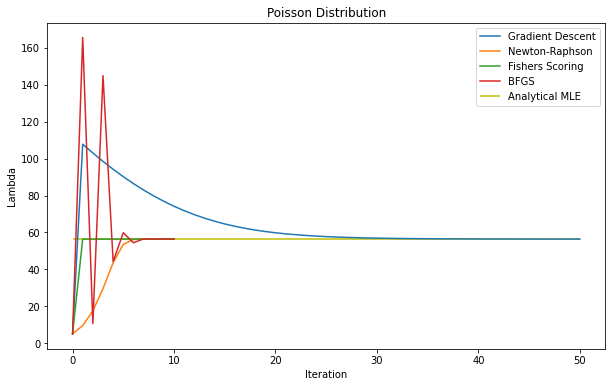

In [13]:
plt.figure(figsize= (10,6))
plt.plot(list(range(len(thetas0))), thetas0, label = "Gradient Descent")
plt.plot(list(range(len(thetas1))), thetas1, label = "Newton-Raphson")
plt.plot(list(range(len(thetas2))), thetas2, label = "Fishers Scoring")
plt.plot(list(range(len(thetas3))), thetas3, label = "BFGS")
plt.hlines(np.mean(data), xmin = 0, xmax = 50, label = "Analytical MLE", color = "y")
plt.xlabel("Iteration")
plt.ylabel("Lambda")
plt.title("Poisson Distribution")
plt.legend();

# Example 2 - Normal Distribution, 2 Dimensions

In [14]:
np.random.seed(0)
data = np.random.normal(50, 5, size = 1000)

In [15]:
def l2(theta, data):
    return -(1/2)*np.sum(((data - theta[0])/theta[1])**2) - len(data)*np.log(theta[1])

def neg_l2(theta, data):
    return -l2(theta, data)
    
def grad2(theta, data):
    return np.array([(np.sum(data) - len(data)*theta[0])/theta[1]**2, 
                     np.sum((data - theta[0])**2/theta[1]**3) - len(data)/theta[1]])

def neg_grad2(theta, data):
    return -grad2(theta, data)

def inverse_hessian2(theta, data):
    return np.linalg.inv(np.r_[np.c_[-len(data)/theta[1]**2, 
                                     (-2*(np.sum(data) - len(data)*theta[0]))/theta[1]**3], 
                               np.c_[(-2*(np.sum(data) - len(data)*theta[0]))/theta[1]**3,
                                     -3*np.sum((data - theta[0])**2/theta[1]**4) + len(data)/theta[1]**2]])

def inverse_info2(theta, data):
    return np.linalg.inv(np.r_[np.c_[-len(data)/theta[1]**2, 
                                     0], 
                               np.c_[0,
                                     -2*len(data)/theta[1]]])

In [16]:
theta0 = np.array([10,2])[:, None]

In [17]:
%%time
thetas0 = gd(theta0, grad2, 0.2/len(data), data, max_iter = 10000)
thetas0

CPU times: user 376 ms, sys: 4.52 ms, total: 381 ms
Wall time: 393 ms


array([[10.        , 11.98868582, 11.99295811, ..., 49.77371493,
        49.77371494, 49.77371495],
       [ 2.        , 42.05760957, 42.05675794, ...,  4.93516579,
         4.93516579,  4.93516579]])

In [18]:
%%time
thetas1 = nr(theta0, grad2, data, inverse_hessian2, max_iter=100)

CPU times: user 47.2 ms, sys: 5.23 ms, total: 52.4 ms
Wall time: 32.4 ms


In [19]:
%%time
thetas2 = fisher(theta0, grad2, data, inverse_info2, max_iter=1000)
thetas2

CPU times: user 247 ms, sys: 24.2 ms, total: 271 ms
Wall time: 146 ms


array([[ 10.        ,  49.77371646,  49.77371646, ...,  49.77371646,
         49.77371646,  49.77371646],
       [  2.        , 202.28804783, 201.78834543, ...,   4.93516579,
          4.93516579,   4.93516579]])

In [20]:
%%time
#%%timeit
#pretty unstable
thetas3 = bfgs(neg_l2, theta0, neg_grad2, data, max_iter = 10)
thetas3

CPU times: user 47.2 ms, sys: 7.61 ms, total: 54.8 ms
Wall time: 27.8 ms


/Users/erictay1997/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


array([[ 1.00000000e+01,  3.20732160e+02,  1.10988431e+03,
         1.07689128e+03,  1.09274097e+03,  1.09274097e+03,
         1.09274097e+03,  1.09274097e+03, -1.08960272e+04,
        -7.41783081e+03,  1.08919716e+07],
       [ 2.00000000e+00,  6.26100149e+03,  9.86721009e+02,
         1.20698102e+03,  1.08211944e+03,  1.08211944e+03,
         1.08211944e+03,  1.08211944e+03, -4.15853555e+03,
        -3.47985155e+02,  5.00329071e+05]])

In [21]:
thetas0 = thetas0[:,[1,10,100,1000,10000]]
thetas1 = thetas1[:,[1,10,100]]
thetas2 = thetas2[:,[1,10,100,1000]]
thetas3 = thetas3[:,[1,10]]

In [22]:
theta = np.array([50,5])[:, None]
l20 = np.sqrt(np.sum((thetas0 - theta)**2, 0))
l21 = np.sqrt(np.sum((thetas1 - theta)**2, 0))
l22 = np.sqrt(np.sum((thetas2 - theta)**2, 0))
l23 = np.sqrt(np.sum((thetas3 - theta)**2, 0))

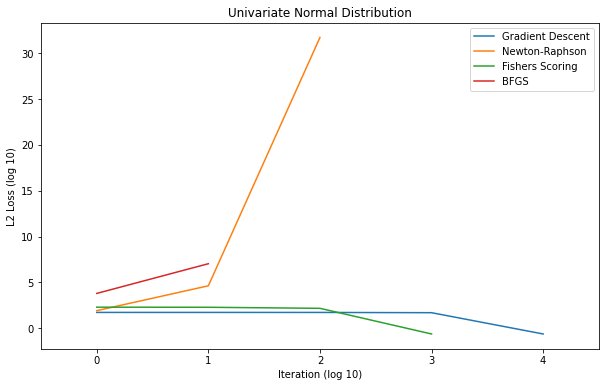

In [23]:
plt.figure(figsize= (10,6))
plt.plot(list(range(len(l20))), np.log10(l20), label = "Gradient Descent")
plt.plot(list(range(len(l21))), np.log10(l21), label = "Newton-Raphson")
plt.plot(list(range(len(l22))), np.log10(l22), label = "Fishers Scoring")
plt.plot(list(range(len(l23))), np.log10(l23), label = "BFGS")
plt.xlabel("Iteration (log 10)")
plt.ylabel("L2 Loss (log 10)")
plt.title("Univariate Normal Distribution")
plt.xlim(-0.5,4.5)
plt.legend();

Convergence for when initialization is close enough

In [24]:
nr(np.array([44,2])[:, None], grad2, data, inverse_hessian2, max_iter=10)

array([[44.        , 53.96844118, 50.57424055, 50.26822374, 50.06943558,
        49.93741953, 49.8514209 , 49.80086314, 49.77875387, 49.77396276,
        49.77371723],
       [ 2.        ,  1.27347927,  1.39499509,  1.82585984,  2.37179887,
         3.02828461,  3.74699792,  4.40152004,  4.80989846,  4.92748745,
         4.93513599]])

In [25]:
#%%timeit
fisher(np.array([44,2])[:, None], grad2, data, inverse_info2, max_iter=30)

array([[44.        , 49.77371646, 49.77371646, 49.77371646, 49.77371646,
        49.77371646, 49.77371646, 49.77371646, 49.77371646, 49.77371646,
        49.77371646, 49.77371646, 49.77371646, 49.77371646, 49.77371646,
        49.77371646, 49.77371646, 49.77371646, 49.77371646, 49.77371646,
        49.77371646, 49.77371646, 49.77371646, 49.77371646, 49.77371646,
        49.77371646, 49.77371646, 49.77371646, 49.77371646, 49.77371646,
        49.77371646],
       [ 2.        ,  8.7114579 ,  8.37192715,  8.04567627,  7.73380208,
         7.43740659,  7.15756255,  6.89527022,  6.65140639,  6.42666857,
         6.22151895,  6.03613483,  5.87037268,  5.72375283,  5.59546926,
         5.48442526,  5.38929121,  5.30857705,  5.24070986,  5.18410739,
         5.13724021,  5.09867863,  5.06712321,  5.04142042,  5.0205662 ,
         5.00370076,  4.9900977 ,  4.97915011,  4.97035543,  4.96330059,
         4.95764809]])

# Example 3 - Logistic Regression, no analytic MLE solution known

In [26]:
np.random.seed(0)
X = np.random.normal(1,1,(100,3))
X[:, 0] = 1
theta = np.random.normal(0,5,(3,1))
probs = 1/(1+np.exp(-X @ theta))
data = np.random.binomial(1,probs)

In [27]:
def l3(theta, data):
    X = data[:, 1:]
    data = data[:, 0][:, None]
    probs = 1/(1+np.exp(-X @ theta))
    return np.sum(np.log(probs)*data + (1-data)*np.log(1-probs))

def neg_l3(theta, data):
    return -l3(theta, data)
    
def grad3(theta, data):
    X = data[:, 1:]
    data = data[:, 0][:, None]
    probs = 1/(1+np.exp(-X @ theta))
    return X.T @ (data - probs)

def neg_grad3(theta, data):
    return -grad3(theta, data)

def inverse_hessian3(theta, data):
    X = data[:, 1:]
    data = data[:, 0][:, None]
    probs = 1/(1+np.exp(-X @ theta))
    D = np.diag((probs*(1-probs)).flatten())
    return -np.linalg.inv(X.T @ D @ X)

def inverse_info3(theta, data):
    return inverse_hessian3(theta, data)

In [28]:
print(theta)

[[-6.53263426]
 [ 8.2906534 ]
 [-0.59082023]]


In [29]:
theta0 = np.array([0,0,0])[:, None]

In [30]:
%time
thetas0 = gd(theta0, grad3, 1/len(data), np.c_[data, X], max_iter = 1000)
thetas0

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 7.87 µs


array([[ 0.        ,  0.09      ,  0.02655808, ..., -4.68244637,
        -4.68277013, -4.68309297],
       [ 0.        ,  0.47420699,  0.68006613, ...,  6.30341779,
         6.30381856,  6.30421821],
       [ 0.        ,  0.06027239, -0.0236871 , ..., -0.71900911,
        -0.71905695, -0.71910465]])

In [31]:
%time
thetas1 = nr(theta0, grad3, np.c_[data, X], inverse_hessian3, max_iter=10)
thetas1

CPU times: user 5 µs, sys: 2 µs, total: 7 µs
Wall time: 7.15 µs


array([[ 0.        , -1.32113501, -2.22772853, -3.20969671, -4.12995695,
        -4.67481577, -4.79708705, -4.80169297, -4.80169901, -4.80169901,
        -4.80169901],
       [ 0.        ,  1.55297532,  2.81474571,  4.2114976 ,  5.51644296,
         6.27718601,  6.44489008,  6.45111317,  6.45112124,  6.45112124,
         6.45112124],
       [ 0.        , -0.04207223, -0.19254868, -0.37966691, -0.58307706,
        -0.70817768, -0.73569431, -0.73670151, -0.7367028 , -0.7367028 ,
        -0.7367028 ]])

Fisher's scoring == NR for logistic regression

In [32]:
%time
thetas2 = bfgs(neg_l3, theta0, neg_grad3, np.c_[data, X], max_iter = 10)
thetas2
# Unstable

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.87 µs


/Users/erictay1997/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/Users/erictay1997/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """
/Users/erictay1997/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/Users/erictay1997/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]


array([[   0.        ,    9.        ,  -49.81565178,  -51.99107168,
         -59.46430646,  -72.13427956,  -50.89404287,  -54.52649807,
         -52.17169253,  -14.20036426,  158.87705477],
       [   0.        ,   47.42069856,   91.94374343,  116.27213427,
          97.51058892,   73.83804967,   81.66107679,   73.26897258,
          62.38599253,   26.78680038, -310.32436033],
       [   0.        ,    6.02723864,  -49.28597822,  -34.94956405,
          -6.6782404 ,    3.7517552 ,   -9.28580659,  -17.28250193,
          -6.10938799,   -2.93889481,  120.77775543]])

In [33]:
l20 = np.sqrt(np.sum((thetas0 - theta)**2, 0))
l21 = np.sqrt(np.sum((thetas1 - theta)**2, 0))
l22 = np.sqrt(np.sum((thetas2 - theta)**2, 0))

In [34]:
l20[:10]

array([10.57162772, 10.2654781 , 10.06308515,  9.89079615,  9.73809868,
        9.59991399,  9.47312259,  9.3556087 ,  9.24585117,  9.14271087])

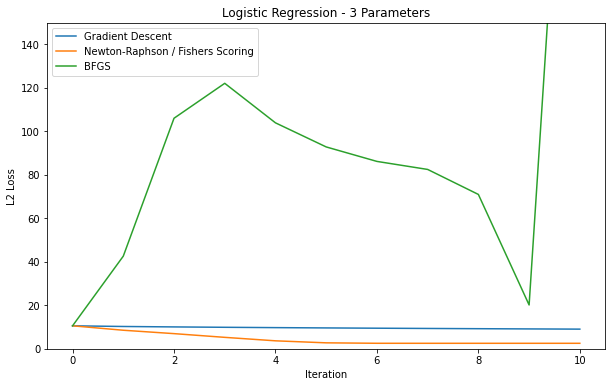

In [35]:
plt.figure(figsize= (10,6))
plt.plot(list(range(len(l21))), l20[:len(l21)], label = "Gradient Descent")
plt.plot(list(range(len(l21))), l21, label = "Newton-Raphson / Fishers Scoring")
plt.plot(list(range(len(l22))), l22, label = "BFGS")
plt.xlabel("Iteration")
plt.ylabel("L2 Loss")
plt.title("Logistic Regression - 3 Parameters")
plt.ylim(0, 150)
plt.legend();

# Example 4 - Multinomial Linear Regression, higher dimensions

In [36]:
n = 5000
d = 5000
np.random.seed(0)
X = np.random.normal(0,1,(n,d))
X[:, 0] = 1
theta = np.random.normal(0,5,(d,1))
data = X @ theta + np.random.normal(0, 1, (n, 1))

In [37]:
def l4(theta, data):
    X = data[:, 1:]
    data = data[:, 0][:, None]
    return -(1/2)*np.sum((data - X @ theta)**2)

def neg_l4(theta, data):
    return -l4(theta, data)
    
def grad4(theta, data):
    X = data[:, 1:]
    data = data[:, 0][:, None]
    return -(X.T @ X @ theta - X.T @ data)

def neg_grad4(theta, data):
    return -grad4(theta, data)

def inverse_hessian4(theta, data):
    return -np.linalg.inv(X.T @ X)

def inverse_info4(theta, data):
    return inverse_hessian4(theta, data)

In [38]:
theta0 = np.zeros(d)[:, None]

In [39]:
theta

array([[-4.55078862],
       [ 2.97279141],
       [ 2.88552115],
       ...,
       [10.17179676],
       [-1.29970582],
       [-4.44035898]])

In [40]:
%%time
gd(theta0, grad4, 0.1/len(data), np.c_[data, X], max_iter = 10)

CPU times: user 31.7 s, sys: 1.25 s, total: 32.9 s
Wall time: 16.9 s


array([[ 0.        , -1.11661088, -1.83053608, ..., -2.79547374,
        -2.77211259, -2.73828815],
       [ 0.        ,  0.68471983,  1.18074619, ...,  2.36819462,
         2.43651835,  2.48956171],
       [ 0.        ,  0.26898831,  0.48450603, ...,  1.251248  ,
         1.33154855,  1.40323581],
       ...,
       [ 0.        ,  0.50710425,  0.96400212, ...,  2.81007395,
         3.01208557,  3.19427153],
       [ 0.        , -0.01158852, -0.07424399, ..., -0.66021176,
        -0.747324  , -0.82903936],
       [ 0.        , -1.51712103, -2.54898041, ..., -4.68731861,
        -4.78957973, -4.86611416]])

In [41]:
%%time
nr(theta0, grad4, np.c_[data, X], inverse_hessian4, max_iter=1)

CPU times: user 15.8 s, sys: 651 ms, total: 16.4 s
Wall time: 9.08 s


array([[ 0.        , -5.05029942],
       [ 0.        ,  2.69266304],
       [ 0.        ,  2.85097117],
       ...,
       [ 0.        , 11.07451482],
       [ 0.        , -1.70834841],
       [ 0.        , -3.26267448]])

In [42]:
%%time
bfgs(neg_l4, theta0, neg_grad4, np.c_[data, X], max_iter = 1)

CPU times: user 1min 22s, sys: 4.51 s, total: 1min 26s
Wall time: 46.1 s


array([[ 0.        , -6.81525196],
       [ 0.        ,  4.17919819],
       [ 0.        ,  1.64177436],
       ...,
       [ 0.        ,  3.0951187 ],
       [ 0.        , -0.07073068],
       [ 0.        , -9.25977192]])

BFGS unfortunately takes too much time.

# Example 5 - Real dataset

In [43]:
df = pd.read_csv("bmd.csv")
df.head()

,id,age,sex,fracture,weight_kg,height_cm,medication,waiting_time,bmd
0,469,57.052768,F,no fracture,64.0,155.5,Anticonvulsant,18,0.8793
1,8724,75.741225,F,no fracture,78.0,162.0,No medication,56,0.7946
2,6736,70.778900,M,no fracture,73.0,170.5,No medication,10,0.9067
3,24180,78.247175,F,no fracture,60.0,148.0,No medication,14,0.7112
4,17072,54.191877,M,no fracture,55.0,161.0,No medication,20,0.7909


In [44]:
df.sex = (df.sex == "M").astype(int)
df["bmi"] = df.weight_kg / df.height_cm**2
data = (df.fracture == "fracture").astype(int).to_numpy()[:,None]
X = df[["age", "sex", "bmd", "bmi"]].to_numpy()
X = np.c_[np.ones(X.shape[0])[:,None], X]

In [45]:
theta0 = np.array([0,0,0,0,0])[:, None]
thetas = nr(theta0, grad3, np.c_[data, X], inverse_hessian3, max_iter=10)
final_theta = thetas[:,-1]
print("Accuracy: {}".format(np.mean((1/(1+np.exp(-X @ final_theta)) > 0.5) == data.flatten())))

Accuracy: 0.8579881656804734


In [46]:
final_theta

array([ 9.79487711e+00,  1.84400431e-02,  8.45992843e-01, -1.51174679e+01,
       -5.13081464e+02])

In [47]:
thetas = gd(theta0, grad3, 1/len(data), np.c_[data, X], max_iter = 10)
final_theta = thetas[:,-1]
print("Accuracy: {}".format(np.mean((1/(1+np.exp(-X @ final_theta)) > 0.5) == data.flatten())))

Accuracy: 0.7041420118343196


/Users/erictay1997/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]
/Users/erictay1997/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


In [48]:
thetas = bfgs(neg_l3, theta0, neg_grad3, np.c_[data, X], max_iter = 10)
final_theta = thetas[:,-1]
print("Accuracy: {}".format(np.mean((1/(1+np.exp(-X @ final_theta)) > 0.5) == data.flatten())))

Accuracy: 0.4319526627218935


/Users/erictay1997/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/Users/erictay1997/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/Users/erictay1997/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in multiply
  """
/Users/erictay1997/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in exp
  del sys.path[0]
/Users/erictay1997/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
